In [1]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# dataset = "https://www.kaggle.com/datasets/erdemtaha/cancer-data/data"

In [3]:
# od.download(dataset)

In [4]:
data_dir = './cancer-data'

In [5]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'cancer-data']

In [6]:
cancer_df = pd.read_csv('Cancer_Data.csv')

In [7]:
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
# Overview of columns:

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# Column "Unnamed: 32" seems null, drop it
# Column id is not useful, drop it

cancer_df.drop(["Unnamed: 32","id"],axis=1,inplace = True) 


In [10]:
cancer_df['diagnosis'].isnull().sum()

0

In [11]:
# Diagnosis is object, convert it to 0, 1 (B = 0 , M = 1)

cancer_df['diagnosis_binary'] = np.where(cancer_df['diagnosis'] == 'M', 1, 0)

In [12]:
# Include all columns (numeric, categorical, object, boolean, etc.)
cancer_df.describe(include='all')


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_binary
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000


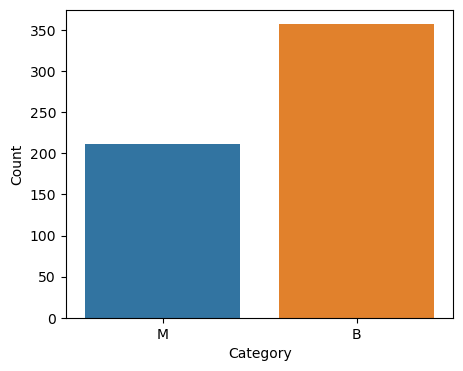

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='diagnosis', data=cancer_df)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [14]:
print("Number of Benign:", (cancer_df['diagnosis'] == 'B').sum())
print("Number of Malignant:", (cancer_df['diagnosis'] == 'M').sum())

Number of Benign: 357
Number of Malignant: 212


In [15]:
x_data = cancer_df.drop(['diagnosis', 'diagnosis_binary'], axis=1)

In [16]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

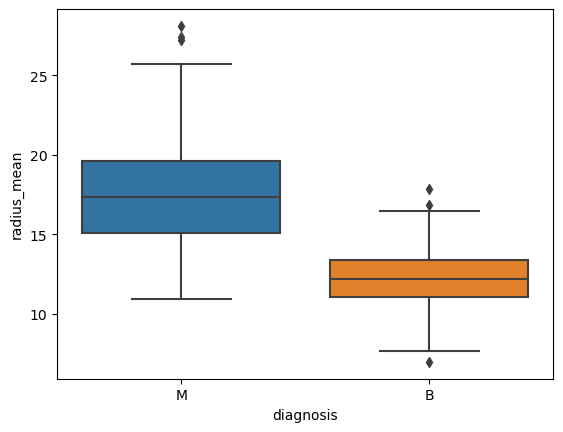

In [17]:
# using boxplots to see the distribution of features among diagnosis categories
# take radius_mean as an example

sns.boxplot(x='diagnosis', y='radius_mean', data=cancer_df)

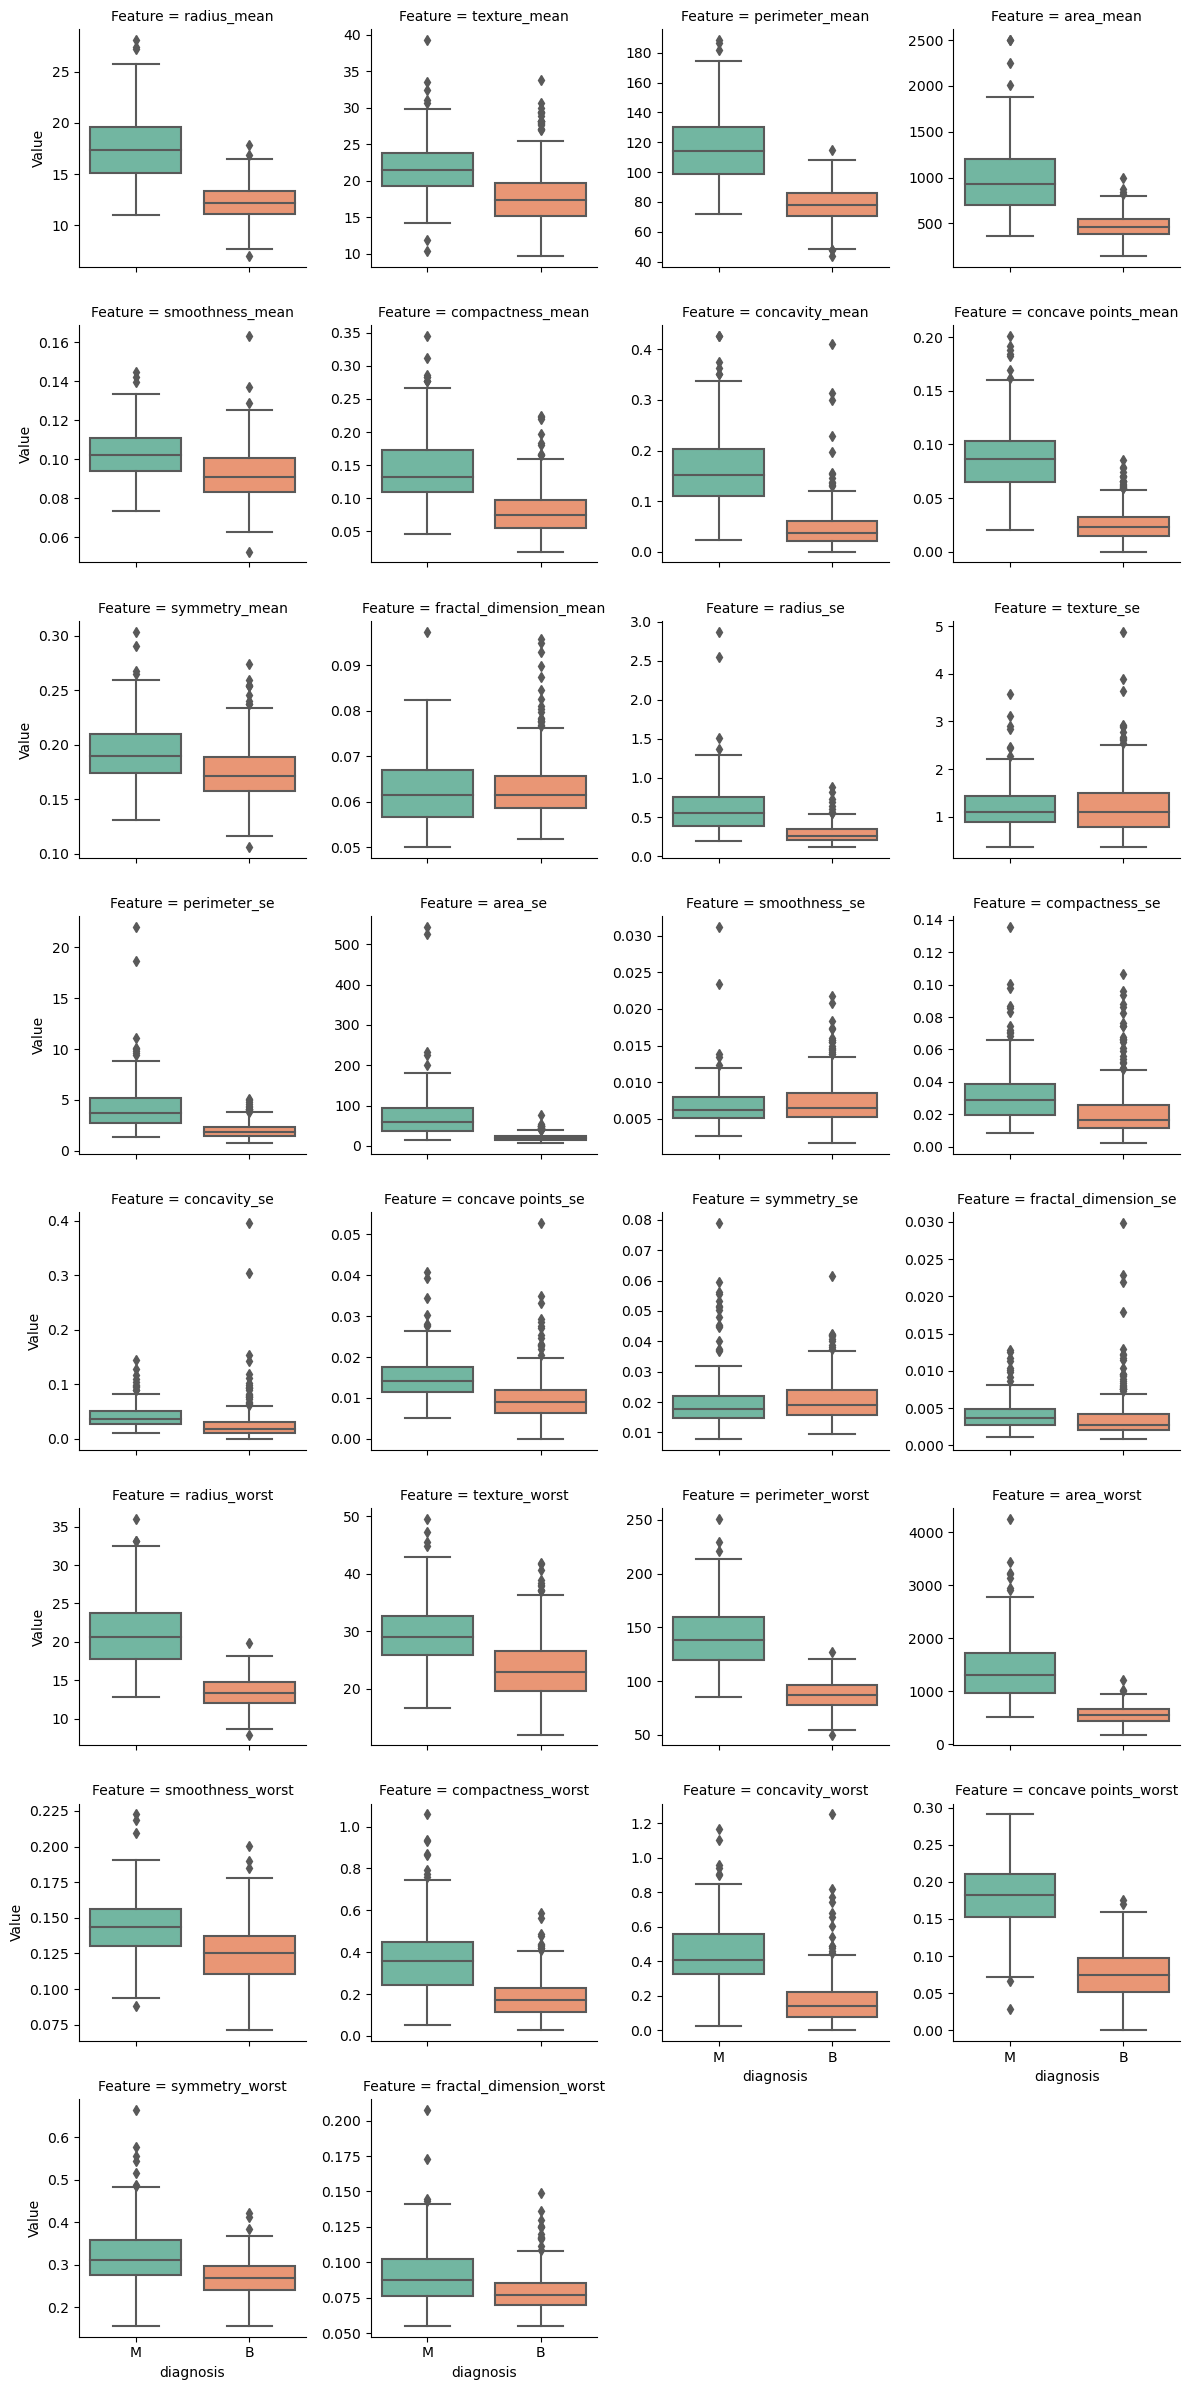

In [18]:
# All boxplots in a grid

# Melt the dataframe: make one column for 'variable' and one for 'value'
# in the original feature dataset there were 569 rows and 30 columns
# melt command makes a matrix w/ diagnosis as a col (ID) and features as another col (value)
# melted_df has a dimension of (569*30 , 3)
# 3 cols: diagnosis, feature, value

melted_df = cancer_df.melt(
    id_vars='diagnosis', 
    value_vars=x_data.columns, 
    var_name='Feature', 
    value_name='Value'
)

# Use FacetGrid to make a small boxplot for each feature
# sharey=False → allows each subplot to have its own y-axis scale (since feature scales differ).
# order=cancer_df["diagnosis"].unique() → ensures the boxes always appear in the same order (e.g., B first, then M).

grid1 = sns.FacetGrid(melted_df, col="Feature", col_wrap=4, sharey=False, height=3)
grid1.map_dataframe(sns.boxplot, x="diagnosis", y="Value", order=cancer_df["diagnosis"].unique(), palette="Set2")

# Adjust layout and show
plt.tight_layout()
plt.show()

grid1.savefig("/Users/maryamfatemi/cancer-data/boxplots.png", dpi=300)


<Axes: xlabel='radius_mean', ylabel='perimeter_mean'>

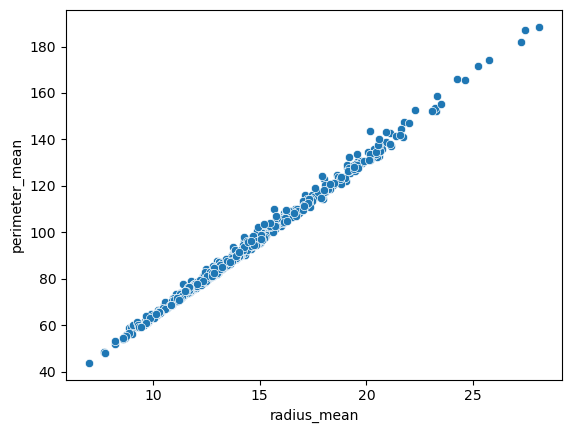

In [19]:
# an overview of boxplots shows that some features might be correlated
# because they have a very similar distribution
# let's check correlation between radius_mean and perimeter_mean

sns.scatterplot(x='radius_mean', y='perimeter_mean', data=cancer_df)

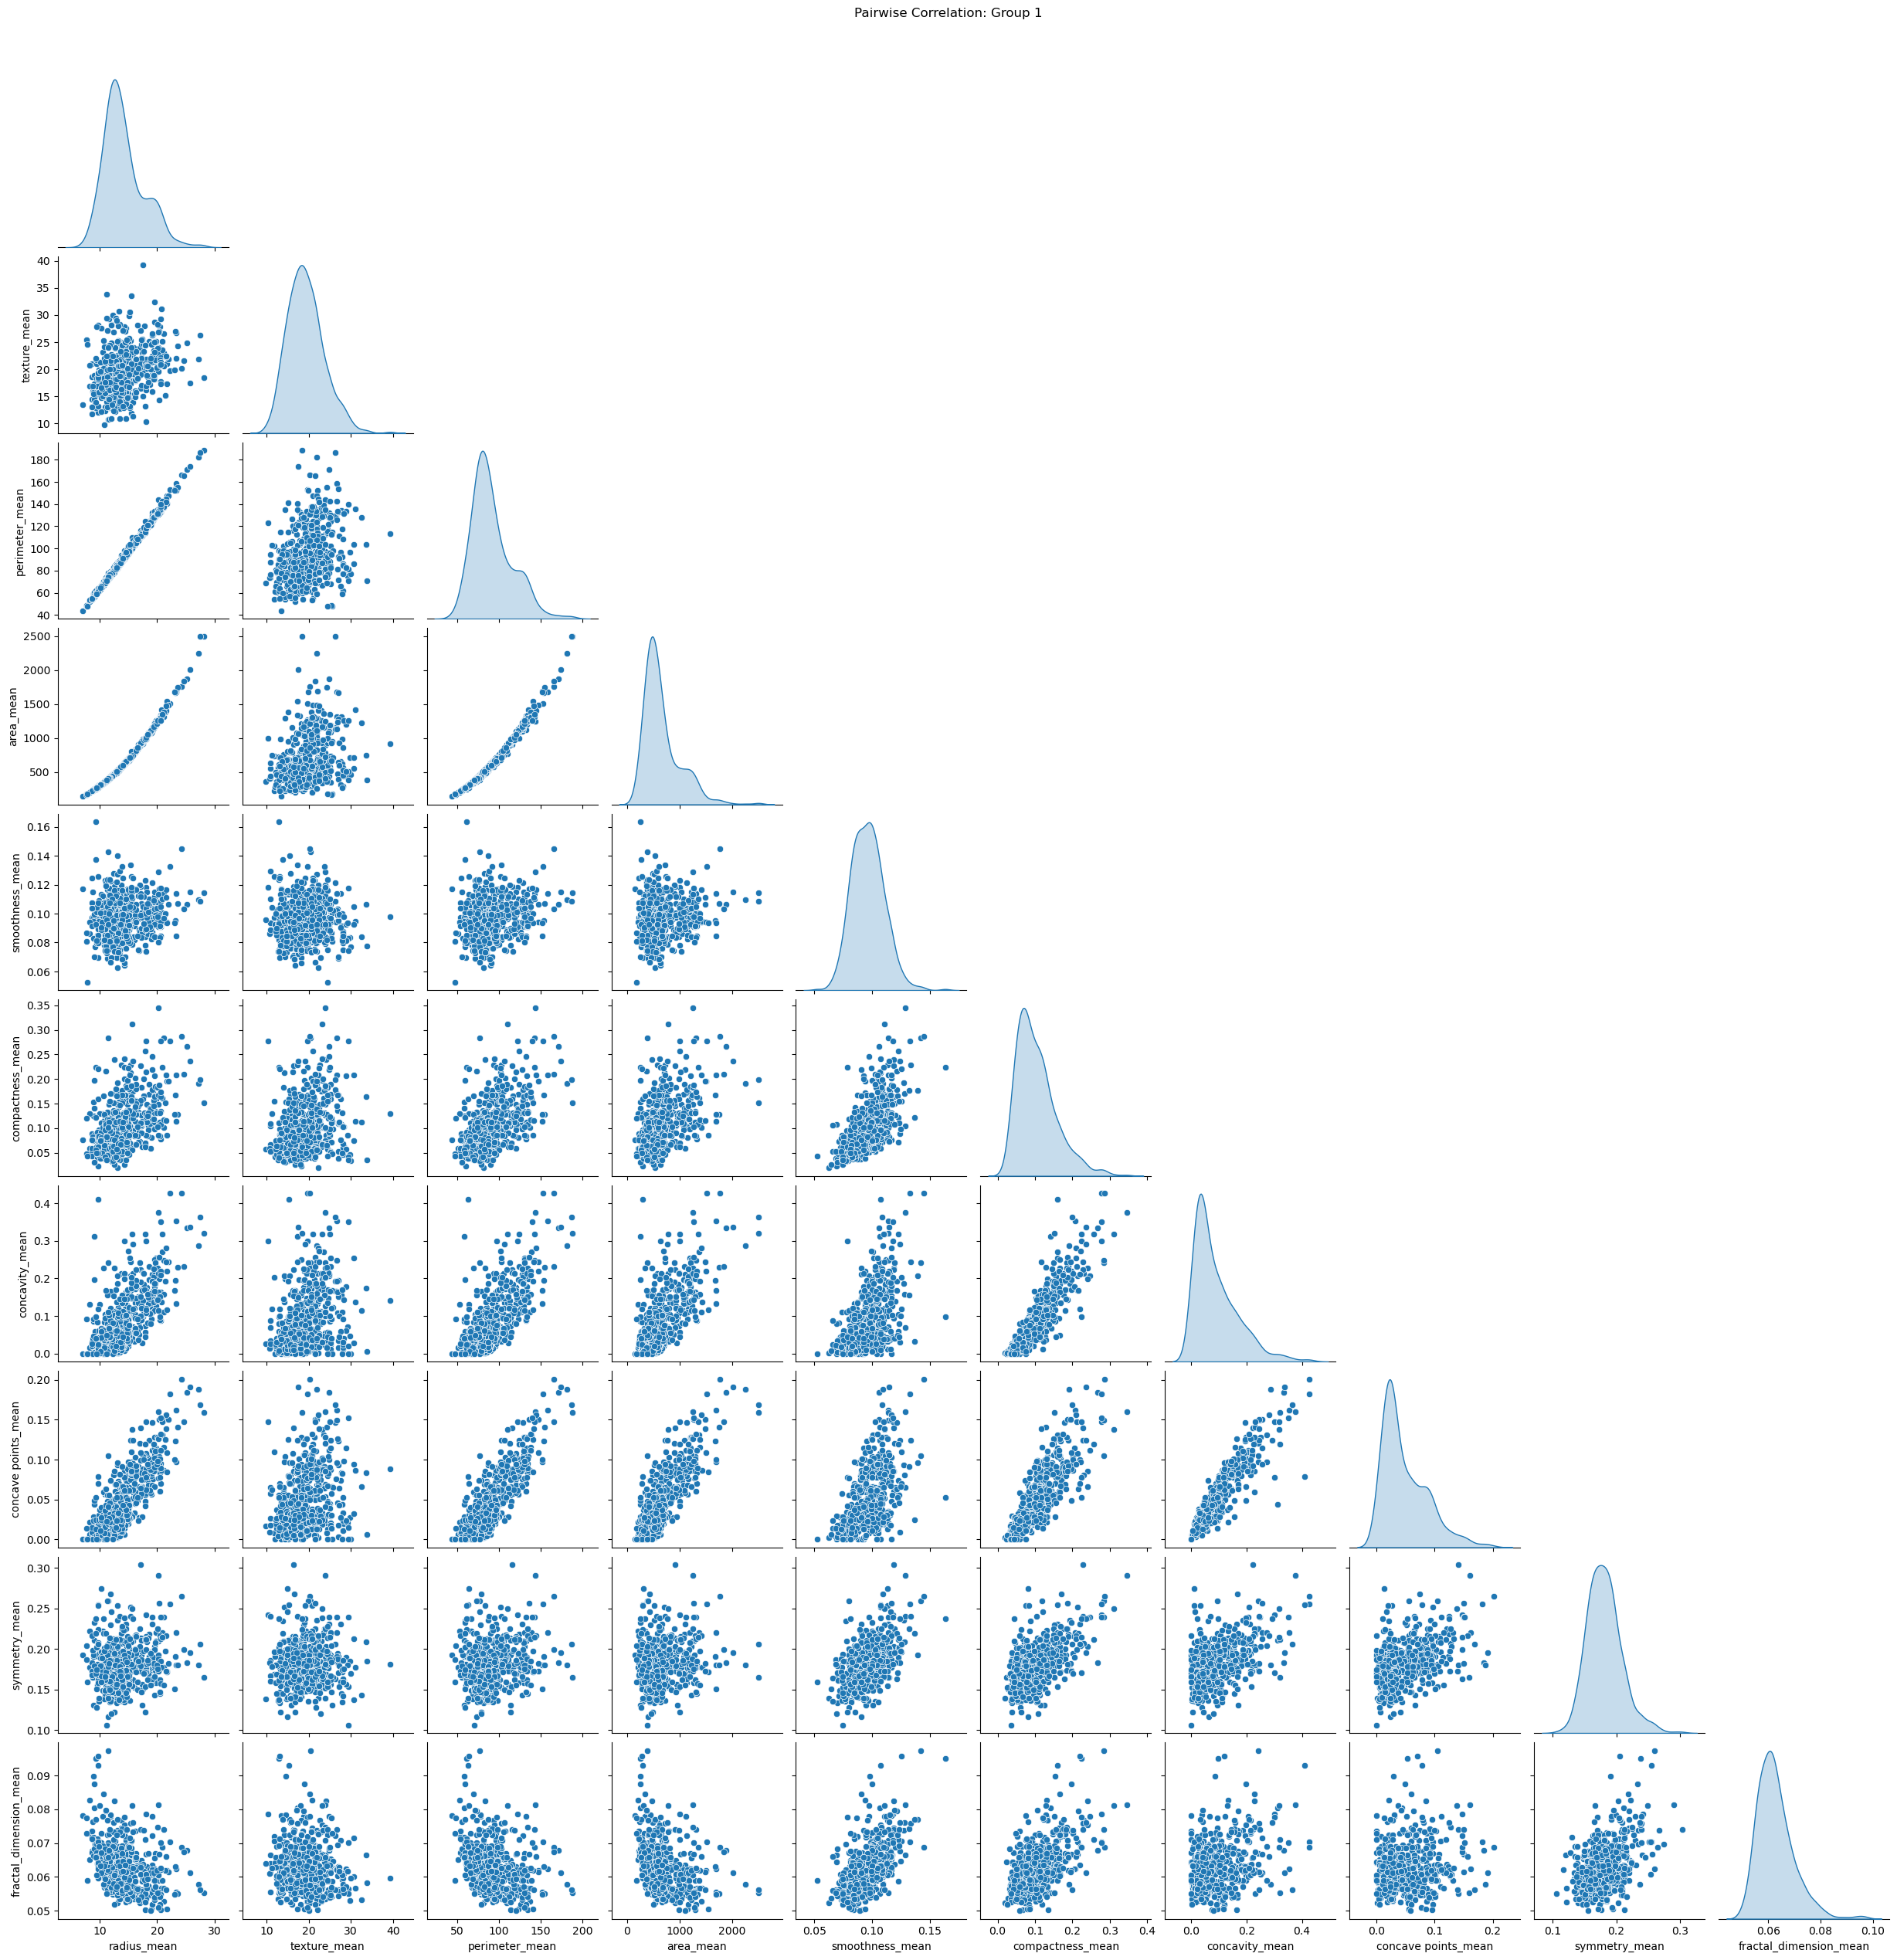

In [ ]:
# All correlations in one picture

cols_group1 = x_data.columns[:10]
cols_group2 = x_data.columns[10:20]
cols_group3 = x_data.columns[20:30]

# diag_kind='kde' → smooth kernel density on the diagonal
# along the diagonal, it shows each variable’s individual distribution.
# the distribution on diagonal is a smoothed version of a histogram (kde)
# corner=True → show only the lower triangle

for i, cols in enumerate([cols_group1, cols_group2, cols_group3], start=1):
    subset = x_data[cols]
    pair = sns.pairplot(subset, diag_kind='kde', corner=True)
    pair.fig.suptitle(f"Pairwise Correlation: Group {i}", y=1.02)
    pair.savefig(f"/Users/maryamfatemi/cancer-data/pairwise_correlation_group{i}.png", dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
# Correlation heatmap

corr = x_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot only the lower triangle
corr_heat, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, annot=True, linewidths=.5, fmt='.2f', ax=ax)

# Label formatting
ax.tick_params(labeltop=True, labelbottom=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(left=True, right=True)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=0)

corr_heat.savefig("/Users/maryamfatemi/cancer-data/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Compute correlation matrix
corr_matrix = x_data.corr().abs()  # take absolute value to handle both + and - correlations

# select upper triangle of correlation matrix to avoid duplicates

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find features with correlation >= 0.9
high_corr = [(col, row, upper.loc[row, col])
             for col in upper.columns
             for row in upper.index
             if not pd.isna(upper.loc[row, col]) and upper.loc[row, col] >= 0.9]

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr, columns=["Feature 1", "Feature 2", "|Correlation|"])
print(high_corr_df)


In [ ]:
# because of the high correlation b/w radius, perimeter, and area, only "radius" is kept 
# for the first round of feature selection (so mean, se and worst variables of area and 
# perimeter are dropped. radius_worst is also dropped. 

# because of the high correlation between/w concavity_mean, concave points_mean, and
# concave points_worst, only concave points_mean is kept and the other two are dropped.

# because of the high correlation b/w texture_mean & texture_worst only the 1st os kept.

# First round of feature selection based on correlations:

drop_list_1 = ['perimeter_mean', 'perimeter_se', 'perimeter_worst', 'area_mean', 'area_se',
               'area_worst', 'radius_worst', 'concavity_mean', 'concavity_se', 
               'concavity_worst', 'concave points_worst', 'texture_worst']

modified_x = x_data.drop(drop_list_1,axis = 1 ) 

In [ ]:
# check heatmap of the selected features:

corr_modifies = modified_x.corr()

# Create a mask for the upper triangle
mask_1 = np.triu(np.ones_like(corr_modifies, dtype=bool))

corr_heat_modified, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_modifies, mask=mask_1, annot=True, linewidths=.5, fmt='.2f', ax=ax)


Accuracy is:  0.9415204678362573


<Axes: >

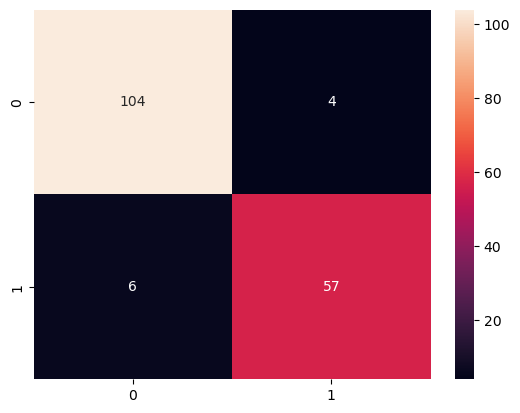

In [34]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(modified_x, y_data, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")